In [2]:
#importing the requests library
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

Using [marketstack](https://marketstack.com/?utm_source=Geekflare&utm_medium=LeadsAcquisition&utm_content=Listing) to make API calls to retrieve end-of-day stock price of your preferred company.

API documentations can be found [here](https://marketstack.com/documentation). Code examples for different languages can be found [here](https://marketstack.com/documentation#php)

In [31]:
def enter_ticker(symbol):
    #making the request
    url = 'http://api.marketstack.com/v1/eod'
    params = {
        'access_key' : '038908b69357069eadcfc963cbafe6ee',
        'symbols' : symbol,
        'limit' : 600
         }
    resp = requests.get(url,params=params)
    data = resp.json()
    
    #getting the list of adjusted close price and dates
#     dates = []
#     adj_close = []
#     for i in data['data']:
#             adj_close.append(i['adj_close'])
#             dates.append(i['date'])
            
    #converting the json data into a df
#     df = pd.DataFrame(list(zip(dates,adj_close)),columns=['date','adj_close'+'_'+symbol])
#     df['date'] = df['date'].astype('datetime64[ns]')
#     df.set_index('date',inplace=True)
     
    df = pd.DataFrame(data=data['data'])
    df['date'] = df['date'].astype('datetime64[ns]')
    df.set_index('date',inplace=True)
    return df

In [32]:
amazon = enter_ticker('AMZN')
amazon

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange
date,,,,,,,,,,,,,,
2023-03-07,94.0600,95.0900,92.7800,93.5500,49100668.0,95.090,92.78,93.5500,94.06,49100668.0,1.0,0.0,AMZN,XNAS
2023-03-06,95.1900,96.5500,93.7400,93.7500,52008400.0,96.545,93.74,93.7500,95.19,52112355.0,1.0,0.0,AMZN,XNAS
2023-03-03,92.7400,94.9400,92.6600,94.9000,55695300.0,94.940,92.66,94.9000,92.74,55759609.0,1.0,0.0,AMZN,XNAS
2023-03-02,91.4100,92.2300,90.3900,92.1300,55509400.0,92.230,90.39,92.1300,91.41,55574820.0,1.0,0.0,AMZN,XNAS
2023-03-01,93.8700,94.6800,91.5900,92.1700,52145000.0,94.680,91.59,92.1700,93.87,52299524.0,1.0,0.0,AMZN,XNAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-14,2919.6201,2948.2898,2817.6799,2837.0601,3547636.0,NaN,NaN,2837.0601,NaN,NaN,1.0,0.0,AMZN,XNAS
2022-03-11,2991.4900,2993.5000,2907.3799,2910.4900,3440500.0,NaN,NaN,2910.4900,NaN,NaN,1.0,0.0,AMZN,XNAS
2022-03-10,2913.7000,2973.4851,2880.0000,2936.3501,6753145.0,NaN,NaN,2936.3501,NaN,NaN,1.0,0.0,AMZN,XNAS


In [33]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-07 to 2022-03-08
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   open          251 non-null    float64
 1   high          251 non-null    float64
 2   low           251 non-null    float64
 3   close         251 non-null    float64
 4   volume        251 non-null    float64
 5   adj_high      96 non-null     float64
 6   adj_low       96 non-null     float64
 7   adj_close     251 non-null    float64
 8   adj_open      96 non-null     float64
 9   adj_volume    96 non-null     float64
 10  split_factor  251 non-null    float64
 11  dividend      251 non-null    float64
 12  symbol        251 non-null    object 
 13  exchange      251 non-null    object 
dtypes: float64(12), object(2)
memory usage: 29.4+ KB


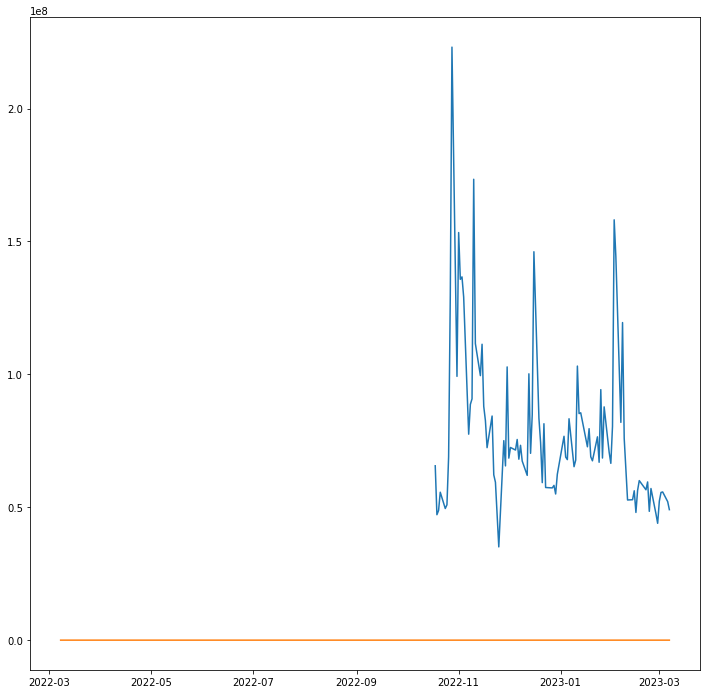

In [45]:
fig,ax=plt.subplots(figsize=(12,12))
ax.plot(amazon['adj_volume'])
ax.plot(amazon['adj_close'])

<AxesSubplot:xlabel='date'>

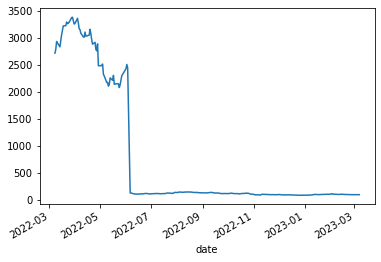

In [41]:
amazon['adj_close'].plot()

In [55]:
transform = amazon.loc[:,['close','volume']]
transform

,close,volume
date,,
2023-03-07,93.5500,49100668.0
2023-03-06,93.7500,52008400.0
2023-03-03,94.9000,55695300.0
2023-03-02,92.1300,55509400.0
2023-03-01,92.1700,52145000.0
...,...,...
2022-03-14,2837.0601,3547636.0
2022-03-11,2910.4900,3440500.0
2022-03-10,2936.3501,6753145.0
